# Application to Antenna Systems

Colab: https://drive.google.com/file/d/1NkFJRtvAhLxQXU83n7l5Q3QMF3Y872lA/view?usp=sharing

I will try to use MoM/CST FDTD and Matlab tool boxes for RF/Electrical circuits/Control Systems


In [1]:
from skrf.media import MLine
import skrf as rf
import sys
import os
sys.path.append('H:\Meu Drive\SocieForParaOPlay')
from SpectralBook.bookfuncs.readCSTFiles import readCSTTDFiles,readCSTTDFilesZLres,readCSTSparZpZLres
from SpectralBook.bookfuncs.simuParams import SimuParam
from SpectralBook.bookfuncs.plotfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot2DTparametric,plot1DSparametricUwrap,plot2DSparametricMagdB,plot2DSparametricPhase
from SpectralBook.bookfuncs.plotfunc import plot2DSparametricMag
from SpectralBook.bookfuncs.TLmodels import mslineBalanis,twoWireTL,parrallelPlate
from numpy import exp, sqrt, cos, sin, log,log10, pi,abs, angle, tanh, loadtxt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

d=2.34e-3
N=10
deltaR=(4-0.373)/(N-1)
R=np.arange(0.373,4+deltaR,deltaR)*1e-3
d=2*pi*R
a=0.1e-3
par=SimuParam()
par.set_empar(id=0,er=2,ur=1,sig=0)


ZL=par.emconst['eta0']
deltaf=0.1
freq=np.arange(0.5,10+deltaf,deltaf)*1e9
omega,beta,Z0=twoWireTL(par.emconst,d,a,freq)


## Multisection transform
def multisectionRin(Z,ZL,beta,L):
    Rin=np.zeros(np.size(beta))
    Reflection=np.zeros(np.size(Z))
    for jj in range(0,len(freq),1):
        for ii in range(0,N,1):
            # print(ii)      
            if ii<N-1:
                Reflection[ii]=(Z[ii+1]-Z[ii])/(Z[ii+1]+Z[ii])
            if ii==N-1:
                Reflection[ii]=(ZL-Z[ii])/(ZL+Z[ii])
            Rin[jj]=Rin[jj]+Reflection[ii]*exp(-2j*ii*beta[jj]*L)

    Zin=Z[0]*(1+Rin)/(1-Rin)   
    return Reflection,Rin,Zin

def multisectionReflection(Z,ZL):
    Reflection=np.zeros(np.size(Z))
    for ii in range(0,N,1):
        # print(ii)      
        if ii<N-1:
            Reflection[ii]=(Z[ii+1]-Z[ii])/(Z[ii+1]+Z[ii])
        if ii==N-1:
            Reflection[ii]=(ZL-Z[ii])/(ZL+Z[ii])

    Rin=5
    return Reflection,Rin


Reflection,Rin=multisectionReflection(Z0,ZL)
L=100e-3
Reflection,Rin,Zin=multisectionRin(Z0,ZL,beta,L)

# R=2*

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\55919\AppData\Local\Temp\ipykernel_21768\2141266196.py:5: SyntaxWarning: invalid escape sequence '\M'
  sys.path.append('H:\Meu Drive\SocieForParaOPlay')


[ 2.34362812  4.8757518   7.40787548  9.93999916 12.47212283 15.00424651
 17.53637019 20.06849387 22.60061755 25.13274123]
[0.373 0.776 1.179 1.582 1.985 2.388 2.791 3.194 3.597 4.   ]


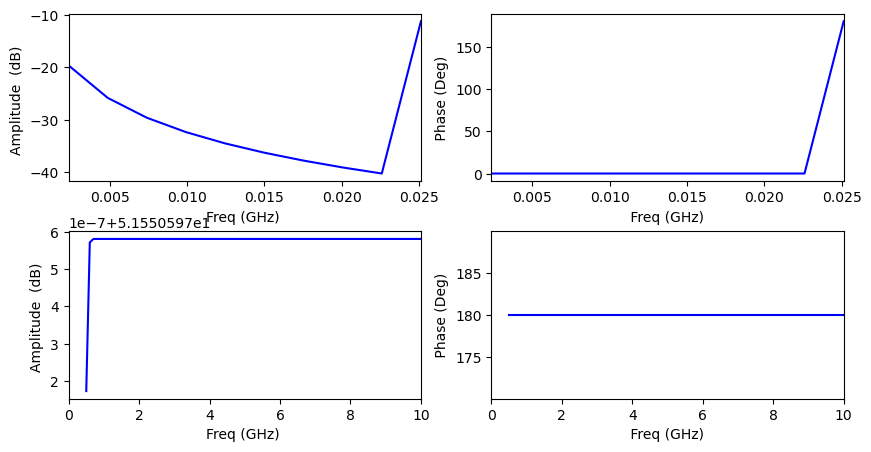

In [2]:
fig,ax=plt.subplots(2,2)
fig.set_size_inches(10,5)
p1=0
p2=0
plot2DSparametricMagdB(ax,d*1e9, [d.min(),d.max()],
                       (p1,p2,Reflection,'b','-'),
                )
p1=0
p2=1
plot2DSparametricPhase(ax,d*1e9, [d.min(),d.max()],
                       (p1,p2,Reflection,'b','-'),
                )
# axt[p1,p2].set_title('S11 Mag vs ZL Res')
# axt[p1,p2].legend(['ZL 50','ZL 30','ZL 100'])

p1=1
p2=0
plot2DSparametricMagdB(ax,freq, [0,10],
                       (p1,p2,Zin,'b','-'),
                )
p1=1
p2=1
plot2DSparametricPhase(ax,freq, [0,10],
                       (p1,p2,Zin,'b','-'),
                )
p1=0
# axt[p1,p2].set_title('S11 Phase vs ZL Res')
# axt[p1,p2].legend(['ZL 50','ZL 30','ZL 100'])
plt.subplots_adjust(wspace=0.2, hspace=0.3)
print(d*1e3)
print(R*1e3)